### Project Objective

Given some features regarding a bank note, we want to predict whether the bank note is genuine or a fake.

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Our variates are:
1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) - 0 for genuine and 1 for fake

In [1]:
from pyforest import*

In [2]:
lazy_imports() # to see all the libraries we imported

['import numpy as np',
 'import sys',
 'import bokeh',
 'import pydot',
 'import datetime as dt',
 'import tensorflow as tf',
 'import keras',
 'import os',
 'import matplotlib as mpl',
 'import re',
 'from openpyxl import load_workbook',
 'import tqdm',
 'import pandas as pd',
 'import sklearn',
 'import awswrangler as wr',
 'from sklearn.ensemble import RandomForestRegressor',
 'import plotly.express as px',
 'import dash',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import lightgbm as lgb',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.model_selection import train_test_split',
 'import statistics',
 'from pyspark import SparkContext',
 'from dask import dataframe as dd',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import xgboost as xgb',
 'import pickle',
 'import nltk',
 'import plotly as py',
 'import glob',
 'from pathlib import Path',
 'from sklearn.manifold import TSN

In [3]:
dataset = pd.read_csv("Bank_Note_Authentication.csv")
dataset.head()

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
dataset.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Exploratory Data Analysis

In [6]:
dataset.isna().any() # Check for the completeness of our dataset

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool

In [7]:
dataset.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [8]:
dataset["class"].value_counts() # Distribution of Response Variate

0    762
1    610
Name: class, dtype: int64

<IPython.core.display.Javascript object>

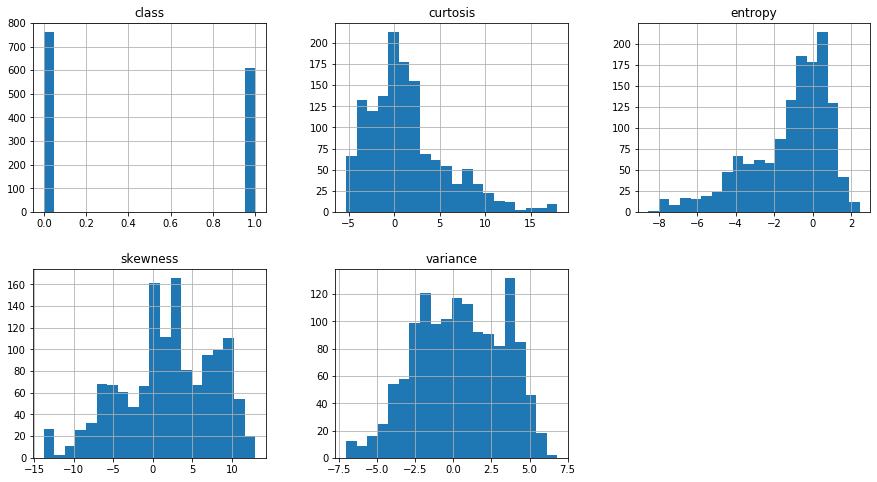

In [9]:
dataset.hist(bins = 20, figsize = (15, 8), layout = (2, 3))
plt.show()

In [10]:
import warnings
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

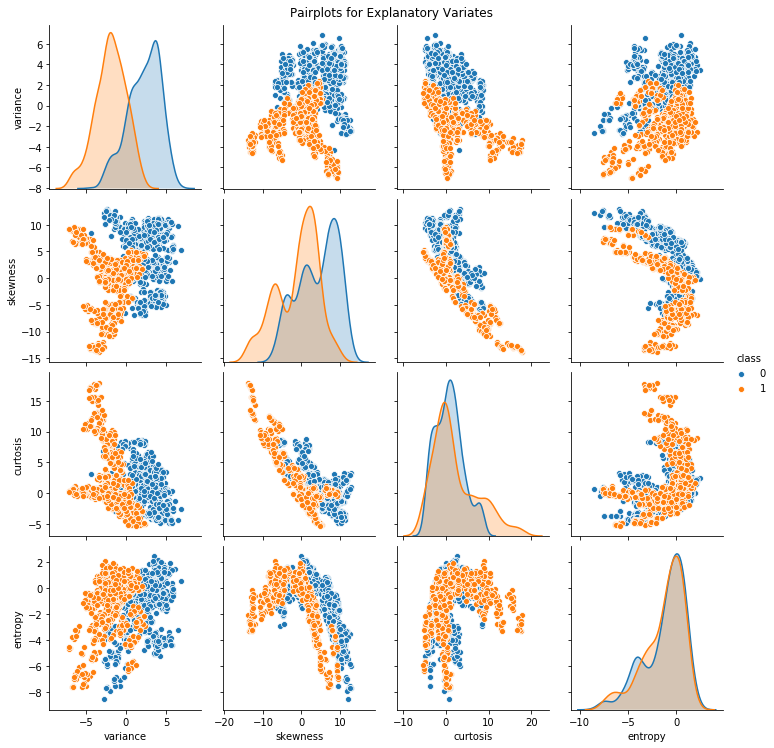

In [11]:
pp = sns.pairplot(dataset, hue = "class")
pp.fig.suptitle("Pairplots for Explanatory Variates", y = 1.02)
plt.show()

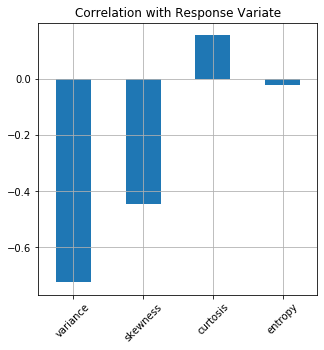

In [12]:
dataset2 = dataset.drop(columns = "class")
dataset2.corrwith(dataset["class"]).plot.bar(figsize = (5, 5), title = "Correlation with Response Variate", fontsize = 10, rot = 45, grid = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

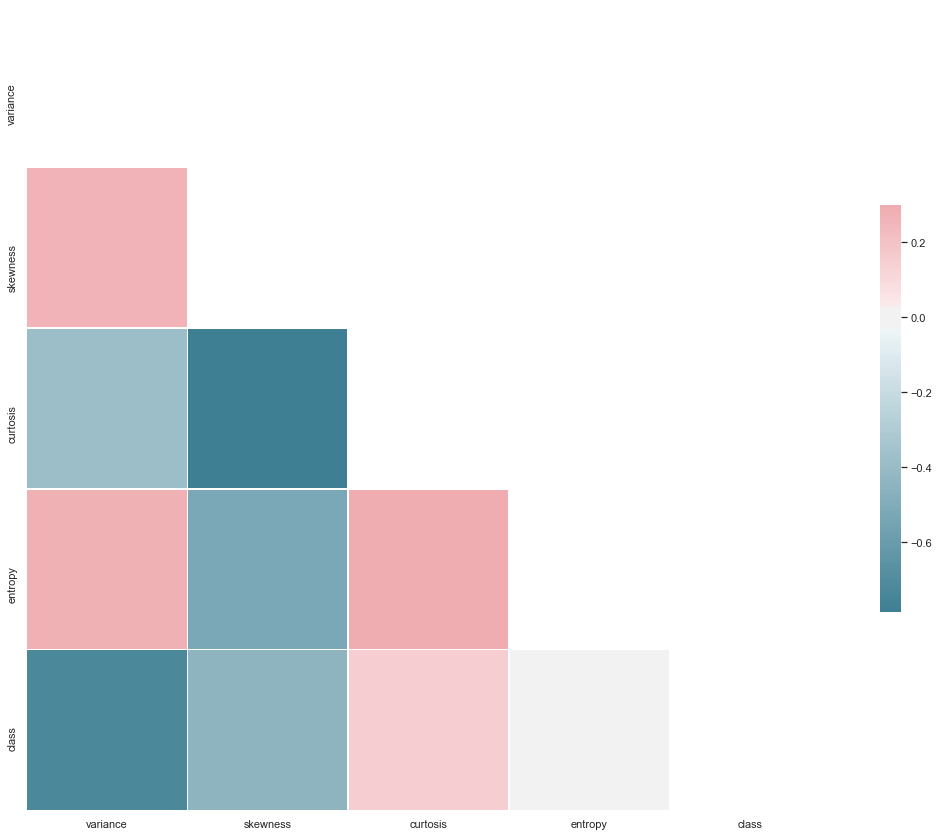

In [13]:
sns.set(style = "white")

corr = dataset.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (18, 15))

cmap = sns.diverging_palette(h_neg = 220, h_pos = 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3, center = 0,
           square = True, linewidth = 0.5, cbar_kws = {"shrink": 0.5})

### Feature Engineering

In [14]:
X = dataset.drop(columns = "class", axis = 1)
y = dataset["class"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

<IPython.core.display.Javascript object>

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

X_train.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy
1226,-1.584382,0.107211,-0.142763,0.033346
1085,-1.088291,-2.531233,2.677833,-0.350930
148,1.136728,-0.153488,-0.168206,0.863688
1178,-0.879848,-0.102851,-0.484320,-0.043242
478,-0.774725,-0.175600,1.362082,0.573936


In [17]:
X_test.head()

,variance,skewness,curtosis,entropy
1240,-1.401610,0.003801,-0.287487,-0.605441
703,0.317701,0.460653,0.213052,0.668459
821,-1.566491,-1.755530,2.626947,-0.126040
1081,-1.956044,0.823005,-0.343667,-2.554626
37,1.137153,-0.182732,0.054884,0.931647


### Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [19]:
log_reg = LogisticRegression(solver = "liblinear", penalty = "l2", random_state = 1)
# liblinear solver ideal for a smaller dataset like ours
log_reg.fit(X = X_train, y = y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred_lr = log_reg.predict(X_test)
y_pred_lr

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [21]:
acc_lr = cross_val_score(estimator = log_reg, X = X_train,
                        y = y_train, cv = 10)
print("Logistic Regression Training Accuracies:\n", acc_lr)

Logistic Regression Training Accuracies:
 [0.98198198 0.99099099 0.98181818 0.99090909 0.99090909 0.98165138
 0.97247706 0.99082569 0.97247706 0.98165138]


In [22]:
print("Logistic Regression Mean Training Accuracy: ", acc_lr.mean())

Logistic Regression Mean Training Accuracy:  0.9835691905416677


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

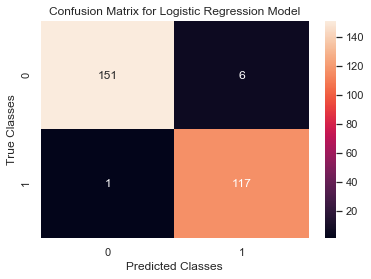

<Figure size 720x720 with 0 Axes>

In [23]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
axes = plt.axes()
plt.figure(figsize = (10, 10))
sns.heatmap(cm_lr, annot = True, fmt = "g", ax = axes)
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
axes.set_title("Confusion Matrix for Logistic Regression Model")
plt.show()

### Linear Support Vector Classifier Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

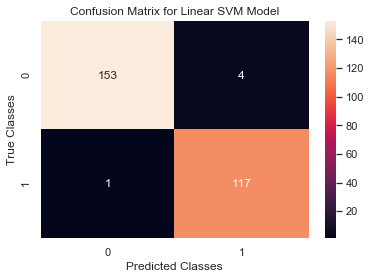

<Figure size 720x720 with 0 Axes>

In [25]:
# Note: This model assumes that our variates 
# are linearly separable
from sklearn.svm import SVC
svml = SVC(kernel = "linear", random_state = 0)
svml.fit(X_train, y_train)
y_pred_svml = svml.predict(X_test)

cm_svml = confusion_matrix(y_test, y_pred_svml)
axes = plt.axes()
plt.figure(figsize = (10, 10))
sns.heatmap(cm_svml, annot = True, fmt = "g", ax = axes)
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
axes.set_title("Confusion Matrix for Linear SVM Model")
plt.show()

### Radial Basis Support Vector Classifier Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

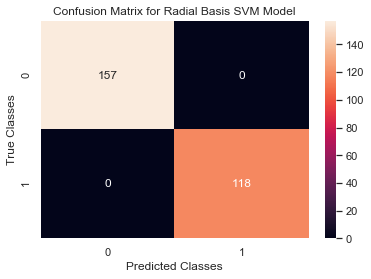

<Figure size 720x720 with 0 Axes>

In [26]:
svmr = SVC(kernel = "rbf", random_state = 1)
svmr.fit(X_train, y_train)
y_pred_svmr = svmr.predict(X_test)

cm_svmr = confusion_matrix(y_test, y_pred_svmr)
axes = plt.axes()
plt.figure(figsize = (10, 10))
sns.heatmap(cm_svmr, annot = True, fmt = "g", ax = axes)
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
axes.set_title("Confusion Matrix for Radial Basis SVM Model")
plt.show()

In [27]:
acc_svmr = cross_val_score(estimator = svmr, X = X_train,
                        y = y_train, cv = 10)
print("Radial Basis SVM Mean Training Accuracy: ", acc_svmr.mean())

Radial Basis SVM Mean Training Accuracy:  1.0


In [28]:
# This is a sign that we have overfitted our model
# It performs too well on the training data

### Random Forest Classifier

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

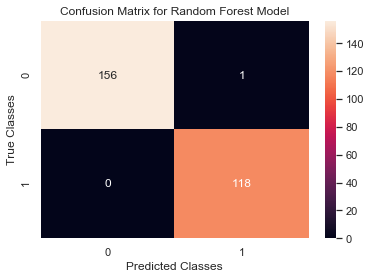

<Figure size 720x720 with 0 Axes>

In [29]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 1,
                                      n_estimators = 100,
                                      criterion = "entropy")
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
axes = plt.axes()
plt.figure(figsize = (10, 10))
sns.heatmap(cm_rf, annot = True, fmt = "g", ax = axes)
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
axes.set_title("Confusion Matrix for Random Forest Model")
plt.show()

In [30]:
acc_rf = cross_val_score(estimator = random_forest, X = X_train,
                        y = y_train, cv = 10)
print("Random Forest Mean Training Accuracy: ", acc_rf.mean())

Random Forest Mean Training Accuracy:  0.9954625851873559


### K Nearest Neighbors Classifier Hyperparameter Tuning

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV
import time
import random

random.seed(2020)

parameter_grid = {"leaf_size": [1, 2, 5, 7, 9, 11], 
             "n_neighbors": [1, 2, 5, 7, 9, 11],
              "p": [1, 3, 5, 7, 9, 11]}

# n_jobs = -1 means use all of the computer's cores to perform
# the computation
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                          param_grid = parameter_grid,
                          scoring = "accuracy",
                          cv = 10,
                          n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Grid Search took %0.2f seconds" % (t1 - t0))

Grid Search took 18.09 seconds


In [32]:
grid_search.best_params_

{'leaf_size': 1, 'n_neighbors': 7, 'p': 5}

In [33]:
knn = KNeighborsClassifier(n_neighbors = 7, p = 5, leaf_size = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=5,
                     weights='uniform')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

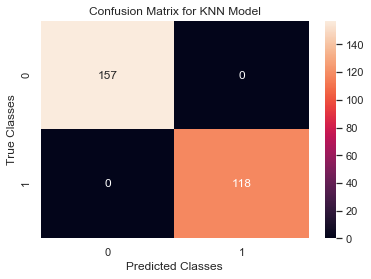

<Figure size 720x720 with 0 Axes>

In [34]:
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
axes = plt.axes()
plt.figure(figsize = (10, 10))
sns.heatmap(cm_knn, annot = True, fmt = "g", ax = axes)
axes.set_xlabel("Predicted Classes")
axes.set_ylabel("True Classes")
axes.set_title("Confusion Matrix for KNN Model")
plt.show()

### Summary of Model Evaluation

In [35]:
columns = ["Model", "Accuracy", "Precision", "Recall", "f1-Score"]
models = [log_reg, knn, svml, svmr, random_forest]
model_names = ["Logistic Regression (Ridge-Regularized)", "KNN", "Linear SVM", "Radial Basis SVM", "Random Forest"]
models_comparisons = pd.DataFrame()
for i in range(0, len(models)):
    y_pred = models[i].predict(X_test)
    name = model_names[i]
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    values = [name, acc, rec, prec, f1]
    zipped = zip(columns, values)
    new_dict = dict(zipped)
    models_comparisons = models_comparisons.append(new_dict, ignore_index = True)
    models_comparisons = models_comparisons.reindex(columns = columns)

models_comparisons

<IPython.core.display.Javascript object>

,Model,Accuracy,Precision,Recall,f1-Score
0,Logistic Regression (Ridge-Regularized),0.974545,0.991525,0.951220,0.970954
1,KNN,1.000000,1.000000,1.000000,1.000000
2,Linear SVM,0.981818,0.991525,0.966942,0.979079
3,Radial Basis SVM,1.000000,1.000000,1.000000,1.000000
4,Random Forest,0.996364,1.000000,0.991597,0.995781
